# Quantitative Methods Workshop, Day 6
## Bulk (Part 1) and Single-Cell (Part 2) RNA Sequencing
By Giselle Valdes and Julian Stanley

### Introductory Note

**If you haven't already, please hit :**

`File` -> `Save a Copy in Drive`

**to copy this notebook to your Google drive, and work on a copy. If you don't do this, your changes won't be saved!**

## Part 1: Bulk RNA-Seq from M1 and M2 Macrophages
Written by Julian Stanley

You've made it to the last day of the QMW, congratulations!

We're going to be doing some analysis with Python and Pandas and making some plots with Matplotlib and Seaborn. 

Just like previous days, let's make sure we have all those packages loaded:

In [ ]:
# set up environment

# Make Sure Packages are Installed
!pip3 install pandas
!pip3 install matplotlib
!pip3 install numpy
!pip3 install seaborn

# Import packages
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

# Set Plotting Presets
plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams.update({'font.size': 14})

# Here's the URL where I uploaded the data we'll be working with
bulkRNAseq_file_location = 'https://raw.githubusercontent.com/julianstanley/QMW2023_BulkRNASeq/main/data/simplified_data_He2021.csv'
bulkRNAseq_file_location_advanced = 'https://raw.githubusercontent.com/julianstanley/QMW2023_BulkRNASeq/main/data/full_data_S4_He2021.csv'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Part 1a: Load and view data

Load the data from the url given in `bulkRNAseq_file_location` into a Pandas dataframe using `pd.read_csv`. Assign it to a variable called `macrophage_fpkm`.

Then, display the first five rows of the dataframe using `macrophage_fpkm.head()`.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd5bc8bd550>]],
      dtype=object)

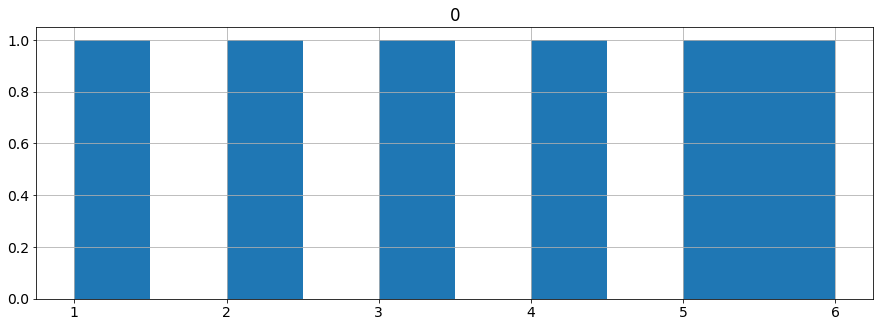

In [ ]:
pd.DataFrame([1,2,3,4,5,6]).hist()

,Gene,immature,A,B
0,TSPAN6,0.070621,0.106641,0.162144
1,TNMD,0.000000,0.000000,0.000000
2,DPM1,20.280869,21.577955,24.723890
3,SCYL3,1.498799,3.859121,1.867398
4,C1orf112,1.032787,1.513904,1.707875


You should see four columns: "Gene", "immature", "A", and "B".

The "Gene" column is the gene of the RNA being quantified.

The other columns are all FPKM-normalized RNA counts.

* Immature are also called "M0" macrophages. These are RNA counts for early, undeveloped macrophages.

"A" and "B" correspond to either M1 or M2 macrophages, but we can't remember which one goes with which. Next, we'll figure that out. 

Just remember that:
* M1 macrophages (generally) activate inflammation.
* M2 macrophages (generally) suppress inflammation.

### Part 1b: Plot M1 and M2 markers to determine the identify of samples A and B.

Let's figure out which of "A" and "B" are M1 or M2 macrophages.

M1 and M2 cells have unique, so-called _marker_ genes. These are genes that have high RNA gene expression in each cell type under most conditions, so we can use them to identify these cells. 

The first gene is "PPARG", which _suppresses_ the production of pro-inflammatory 
compounds. 

**PPARG is a marker of anti-inflammatory, M2 macrophages**. That is, PPARG will have the highest RNA level in M2 macrophages. 

The second gene is "CCR7", which leads to the activation of other immune cells.


**CCR7 is a marker of pro-inflammatory, M1 macrophages**. That is, CCR7 will have the highest RNA level in M1 macrophages. 

First, create a new variable, named `genes_of_interest_fpkm` that 
takes `macrophage_fpkm` and filters it, on the "Gene" column, so that it only has rows with "CCR7" and "PPARG".

Hint: To filter a dataframe, called `data`, on the "Gene" column, so that it only has rows with "GeneA", and "GeneB", you could type:
`genes_of_interest = data[data["Gene"].isin(["GeneA", "GeneB"])`

Use `.head()` to view the first few rows of `genes_of_interest_fpkm`

To plot this data most easily, we want it to look like this instead:

| Gene  | Cell Type | FPKM       |
|-------|-----------|------------|
|  CCR7 |  immature |   1.724602 |
| PPARG |  immature |  37.502964 |
|  CCR7 |         A | 128.391052 |
| PPARG |         A |   6.706289 |
|  CCR7 |         B |   2.396366 |
| PPARG |         B |  81.222435 |

You can do this by hand, or with various round-about coding tricks (which is what I did for years), but there's a function called `.melt()` that can do it for you. 

I'll provide you that code below, which uses the "Gene" column as a label, then turns the other columns into a new column called "Cell Type", and matches them with their values in a column called "FPKM".

Rearranging data like this is often called "tidying" the data, named in a [2014 paper](http://vita.had.co.nz/papers/tidy-data.pdf) from the data visualization mastermind (and head programmer for RStudio) Hadley Wickham.

In [ ]:
genes_of_interest_fpkm_tidy = genes_of_interest_fpkm.melt(id_vars = ["Gene"], 
                                                          var_name = "Cell Type", 
                                                          value_name = "FPKM")

Print out `genes_of_interest_fpkm_tidy` to make sure it looks as expected

Now, make a plot using `sns.barplot()`. Use the following arguments:
* `data = genes_of_interest_fpkm_tidy`
* `x = "Gene"`
* `y = "FPKM"`
* `hue = "Cell Type"`

Which sample, "A" or "B", corresponds to M1 macrophages? M2?

### Part 1c: Histograms and log transformations

To do most analyses of RNA data, you need to log transform the read-and-length-normalized RNA expression levels. 

This is because many statistical analyses assume that the data is normally-distributed. Most sequencing data is [log-normal](https://en.wikipedia.org/wiki/Log-normal_distribution), meaning that it isn't usually normally distributed, but if you take the log of all the data, it's approximately normal. 

Here are a few exercises to demonstrate that.

------------------

Plot a histogram of the FPKM values for one of the 3 samples. 

Use the plt.hist() function

**Does this data look normally distributed?**

Try log-transforming that same data before you plot the histogram.

(To log-transform an entire column, see the `np.log` function)

In [ ]:
# Warning: this should give an error


You should get a "ValueError: supplied range ... is not finite". 

**What is causing that error?**

It's common to add "1" to all values in RNA-seq data so that no values are equal to 0. Since you're adding the same value to every sample, this doesn't make a big difference in later analyses.

Adding 1 is called adding a _pseudocount_

----------

Plot the histogram again, this time using `macrophage_fpkm["sample"] + 1` to add a pseudocount to each cell.

**Does this data look normally distributed?**

Oftentimes, RNA-seq data is very sparse -- that is, many FPKM values are "0".

In these cases, sometimes it's beneficial to filter out genes that were not detected in any sample: a common cuttoff is an FPKM of "1" in at least one sample (that is, one sample must have at least 1 mRNA molecule for a given gene, if they had 1 million mRNA molecules total).

----------

Filter `macrophage_fpkm` so that genes must have at least 1 sample with an FPKM greater than 1. 

Name the new table `macrophage_fpkm_filter1`

Filtering like this can be tricky sometimes (the parentheses are important!) so I'll provide the code below:

In [ ]:
macrophage_fpkm_filter1 = macrophage_fpkm[(macrophage_fpkm['immature'] >= 1) & (macrophage_fpkm['A'] >= 1) & (macrophage_fpkm['B'] >= 1)]

How many rows did you filter out? Use the `.shape` attribute (e.g., `macrophage_fpkm.shape`) to see how many rows are in `macrophage_fpkm` and `macrophage_fpkm_filter1`.

Re-plot your histogram, with pseucounts and a log transform, with the new, `macrophage_fpkm_filter1` data.

This now looks close to a normal distribution, with a bit of a right skew. This should be close-enough to normal for most statistical analyses. 

Finally, create a variable called `macrophage_fpkm_filter1_log` in which all three sample columns have pseudocounts and are log-transformed.

,Gene,immature,A,B
2,DPM1,3.057809,3.116974,3.247420
3,SCYL3,0.915810,1.580858,1.053405
4,C1orf112,0.709408,0.921837,0.996164
5,FGR,6.530200,5.670384,6.200391
7,FUCA2,3.678074,3.922952,3.875431


### Part 1d: Analyzing the effect of drugs

One of the main purposes of the [He 2021](https://doi.org/10.1016/j.celrep.2021.109955) paper that this data comes from is to analyze the effect of two drugs that might block M2 development, abbreviated PANO and TRAM.

So, they treat cells with PANO and TRAM. They also treat the cells with DMSO, as a control, since DMSO shouldn't affect M2 development.

In the `bulkRNAseq_file_location_advanced` file, I provide their data from supplementary figure S4. I only made a couple changes: I included only one replicate (the real data includes two replicates that you'd need to average) and I deleted one of the columns (that contains alternative gene IDs).

Let's load that data:

In [ ]:
macrophage_fpkm_full = pd.read_csv(bulkRNAseq_file_location_advanced)

Now that the data is loaded, we can filter to only include M2 columns:

In [ ]:
macrophage_fpkm_M2 = macrophage_fpkm_full[["Gene", "DMSO_M2_1", 
                                           "PANO_M2_1", "TRAM_M2_1"]]

In Figure S10A (found in [this PDF](https://www.cell.com/cms/10.1016/j.celrep.2021.109955/attachment/ff2a1de1-d419-4bf7-9df2-1ec29a4b757b/mmc1), page 16 on the right side) the authors include genes that change in macrophages after PANO or TRAM treatment.

Some of these genes are genes that are known to be important to M2 development (this is important, because that suggests that those drugs could be used to treat cancer, since too many M2 macrophages can promote cancer growth).

These genes include:
* IL1B
* PDGFB
* ICAM1
* MYC


First, filter the dataset for one of these genes:

In [ ]:
macrophage_fpkm_M2_gene = macrophage_fpkm_M2[macrophage_fpkm_M2["Gene"] == "IL1B"]

Now, modify the code to tidy the data and create a `sns.barplot`, just like we did Part 1b.

Describe the effects that you observe. Repeat this process with the other three genes.

Also repeat the process with one gene that you think should have no effect on M2 polarization (good genes to check here are [Housekeeping genes](https://en.wikipedia.org/wiki/Housekeeping_gene), which are known to not change too much between conditions. A good one to start is "ILF2")

If you have extra time: can you create a single plot that includes all 4/5 genes of interest?

### Part 1e: Download the original data

Still have extra time? Play around with different genes found in the [supplementary information](https://www.cell.com/cms/10.1016/j.celrep.2021.109955/attachment/ff2a1de1-d419-4bf7-9df2-1ec29a4b757b/mmc1), or download the data yourself, Table S4 in the "Supplementary Data" section [here](https://doi.org/10.1016/j.celrep.2021.109955) and try to take the mean of each sample replicate and recreate some of the paper's analyses.

## Part 2: Analyzing Single-Cell Gene Expression to Identify Cell Type Clusters
Written by Giselle Valdes

### Introduction to the Exercise

We hypothesize that we can detect different types of peripheral blood mononuclear cells using single-cell RNA-Seq.

You will start with normalized expression values of the most variable genes in a population of peripheral blood mononuclear cells, and will work through the following steps:

1. Transform the normalized expression values.
2. Use PCA and UMAP to reduce dimensionality and visualize.
3. Use kmeans clustering to cluster cells based on gene expression profiles.
4. Find highly expressed genes within clusters
5. Visualize gene expression within your dataset


### 2a. Loading and Transforming the Normalized PBMC Dataset

In [ ]:
#set up environment
import pandas as pd
import numpy as np
import seaborn as sns

#load normalized data
file = 'https://raw.githubusercontent.com/gval38/PBMC_dataset/main/pbmcs.txt'
A_table = pd.read_csv(file, sep='\t', header=0, index_col=0)

#log transform data
A_log=np.log(A_table+1)


What do the rows and column of our log transformed table, A_log, represent? 

Hint: It might be helpful to visualize the head of the data, as you did previously.

In [ ]:
#Visalize the first 5 rows of data
A_log.head()

,TNFRSF4,CPSF3L,ATAD3C,C1orf86,RER1,TNFRSF25,TNFRSF9,CTNNBIP1,SRM,UBIAD1,...,DSCR3,BRWD1,BACE2,SIK1,C21orf33,ICOSLG,SUMO3,SLC19A1,S100B,PRMT2
AAACATACAACCAC-1,0.0,0.0,0.0,0.0,0.000000,2.226555,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
AAACATTGAGCTAC-1,0.0,0.0,0.0,0.0,1.111715,0.000000,0.0,0.000000,0.0,0.0,...,0.0,1.111715,0.0,0.0,1.111715,0.0,0.000000,0.0,0.0,0.000000
AAACATTGATCAGC-1,0.0,0.0,0.0,0.0,1.429744,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,1.429744
AAACCGTGCTTCCG-1,0.0,0.0,0.0,0.0,1.566387,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,1.566387,0.0,1.566387,0.0,0.0,0.000000
AAACCGTGTATGCG-1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,2.416278,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000


### 2b-1. Dimensionality Reduction with PCA

In [ ]:
#Run PCA on the transformed data to reduce dimensions
from sklearn.decomposition import PCA
PCA = PCA(n_components=50)
PCA.fit(A_log) #find PCs for data
A_pca = PCA.transform(A_log)# applies PCs to data (projects data points onto PCs)


In [ ]:
pd.DataFrame(A_pca)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-4.434026,0.250232,-1.498861,-0.003177,0.915319,-0.678758,-1.088754,-0.942395,3.108002,1.111727,...,0.413463,-1.421173,-0.470513,-1.147069,-1.867310,-0.949909,1.508717,-3.347181,-0.505150,-0.122076
1,-0.758417,-4.248603,6.066877,-1.804408,1.217160,-0.636761,0.354287,0.405094,1.132560,-1.474235,...,-0.344941,0.019303,-0.668095,0.387455,-1.418386,0.970030,0.552040,0.474943,1.188038,-0.627161
2,-2.828663,1.395358,-2.975468,-3.697265,1.022456,0.724843,1.840505,0.913616,-1.159927,-1.171632,...,-0.776531,-1.197890,0.444292,-0.103266,-0.151162,0.902831,-0.251604,-0.304230,0.921684,0.894450
3,11.277043,0.625911,1.211095,-0.594050,0.959327,0.674050,-0.747047,-0.358027,-0.984358,0.348626,...,-0.656925,-0.619722,-0.498953,-1.580063,-0.538174,0.744157,0.397019,-0.676203,-0.269736,3.188242
4,-2.079163,7.290677,4.432146,5.058110,-2.843560,3.137843,0.658867,-0.762703,-2.040230,1.717354,...,2.067787,-2.239389,-1.887245,0.317124,-1.390871,1.042627,2.859139,-0.749622,-1.709098,-0.144785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2633,11.572065,-0.376104,0.526794,-0.798357,-0.422798,-2.243456,2.225430,-2.113229,-0.201485,0.489201,...,0.889351,0.274837,0.816225,-0.134032,0.260464,0.729112,0.251714,0.741135,0.558236,0.907352
2634,-1.285607,-2.378037,2.955052,-1.237183,0.709693,0.870953,0.447295,0.270915,-0.818156,1.637888,...,-0.203029,-3.253886,-0.114188,0.164444,0.977267,0.928396,-0.812150,1.628651,-1.833242,-0.876227
2635,-2.888990,-7.058879,5.588694,0.270656,-1.054954,0.251689,-0.024510,-0.177867,-0.660705,-1.028945,...,-0.363300,0.542209,-0.410786,0.463398,1.196365,-1.273019,-2.059074,0.448396,-1.654807,0.536477
2636,-1.778461,-5.386581,6.251892,1.553993,-0.238298,-0.999253,-0.331191,0.932077,-2.529190,1.358034,...,0.418373,0.229496,-1.004082,1.395435,-0.324278,1.546524,-0.000483,-0.768453,0.353640,1.829357


Now that we have run PCA on our transformed data, we can visualize the output of the PCA by plotting the 1st principal component on the x-axis and the 2nd principal component on the y-axis. Given the documentation of the [PCA function](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) and the [scatter function](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html), determine the correct x- and y- inputs for the scatter plot indicated by ???.

Text(0, 0.5, 'PC2')

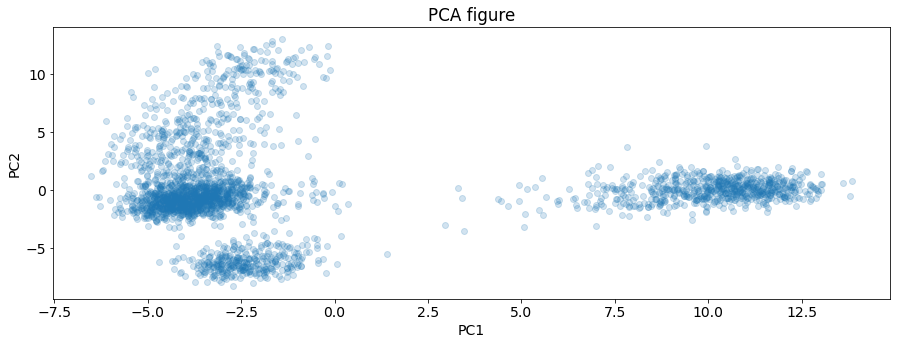

In [ ]:
#Plot PC output from PCA
import matplotlib.pyplot as plt
plt.scatter(A_pca[:, 0] , A_pca[:, 1] , alpha=0.2)
plt.title('PCA figure')
plt.xlabel('PC1')
plt.ylabel('PC2') 

### 2b-2. Dimensionality Reduction with UMAP

In [ ]:
#UMAP Dimensionality Reduction
!pip install umap-learn[plot]
!pip install holoviews
!pip install -U ipykernel

import umap
reducer = umap.UMAP()
reducer.fit(A_log)
A_UMAP = reducer.transform(A_log)
assert(np.all(A_UMAP == reducer.embedding_))


Now that we have run UMAP dimensionality reduction on our transformed data, we can visualize its output by plotting the first two dimensions of its projection on the x- and y-axis of our plot, respectively. Given the Python indexing logic applied for your previous plotting exercise, and the documentation of the [UMAP function](https://umap-learn.readthedocs.io/en/latest/plotting.html) and the [scatter function](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html), determine the correct x- and y- inputs for the scatter plot indicated by ???.

In [ ]:
#Plot 2D UMAP projection
plt.scatter( ??? , ??? , cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the PBMC dataset', fontsize=24);
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')


### 2c. Using k-Means to Cluster Cells

Finally, let's run a [k-means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) clustering method to group the observations into clusters based on their gene expression profiles.

First, define how many clusters we should group this data into. Hint: How many PBMC cell types are there?

In [ ]:
#Using Kmeans clustering to group cells into clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters= ??? , max_iter=10000)
kmeans.fit(A_pca)
cluster_labels = kmeans.predict(A_pca)

Now that we have given every cell in our dataset a cluster assignment, we can overlay them onto the positions of our cells on the UMAP scatter plot you generated previously. 

*Note that the missing portion of code in the line plt.scatter(???, ???, c=cluster_labels, cmap='viridis', alpha=0.5) should match the x- and y- axis of your completed 2D UMAP projection plot.*

Text(0, 0.5, 'UMAP2')

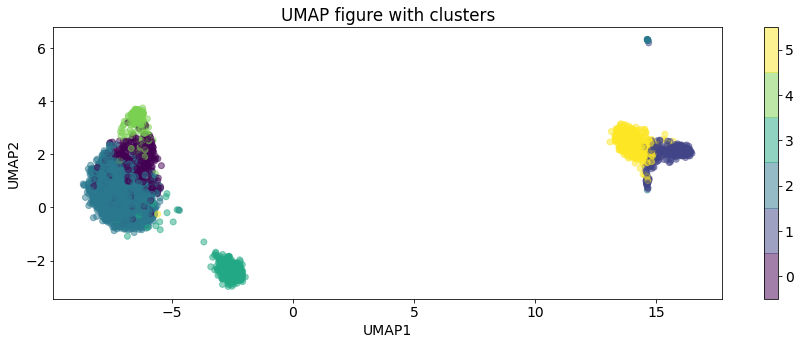

In [ ]:
#Overlaying cluster identity to cell position on UMAP plot
plt.scatter( ??? , ??? , c=cluster_labels, cmap='viridis', alpha=0.5)
plt.colorbar(boundaries=np.arange(7)-0.5,cmap='viridis', alpha=0.5).set_ticks(np.arange(6))
plt.title('UMAP figure with clusters')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')

### 2d. Find Highly Expressed Genes Within Clusters

In [ ]:
#@title Run Me! Most Highly Expressed Genes per Cluster Function: top_genes
#Finding highly expressed genes within clusters
def top_genes(cluster_num, sig_thresh):
  for i in range(cluster_num):
    #cluster indices
    sample_indices = np.where(cluster_labels == i)
    sample_values = A_log.iloc[sample_indices]

    #Find most highly expressed gene for each sample in cluster
    sample_values['Max'] = sample_values.idxmax(axis=1)
    values, counts = np.unique(sample_values['Max'], return_counts=True)
    indexes = [
      index for index in range(len(counts))
      if counts[index] > sig_thresh 
    ]
    cluster_gene_list=values[indexes]
    print("Cluster " + str(i) + " gene list:", cluster_gene_list)


Above we have a function, top_genes, that acts to identify the most highly expressed genes within a range of clusters in your dataset.

The function top_genes has two parameters for which it takes arguments, cluster_num and sig_thresh. Cluster_num defines the range of clusters you would like to run the function for in your dataset. Sig_thresh defines the threshold of how significant the identified "most highly expressed gene" list is. 

Try applying a variety of integer value arguments for these parameters, and see the effect it has on the resulting gene list for each cluster. How does changing this impact the length of the list and what clusters it is applied to? Why do you think this is the case?

In [ ]:
#Change the argument values for this function!
top_genes( ??? , ??? )

<ipython-input-44-ed1879bab660>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_values['Max'] = sample_values.idxmax(axis=1)


Cluster 0 gene list: ['CCL5' 'GNLY' 'GZMK' 'IL32' 'LTB' 'NKG7']
Cluster 1 gene list: ['AIF1' 'COTL1' 'CST3' 'FCER1G' 'HLA-DPB1' 'HLA-DRB1' 'LST1' 'S100A6'
 'SAT1' 'TYROBP']
Cluster 2 gene list: ['CCL5' 'CD48' 'GIMAP4' 'GIMAP7' 'HINT1' 'IL32' 'LIMD2' 'LTB' 'PNRC1'
 'PPBP' 'PTPRCAP' 'RBM3' 'S100A6' 'SELL' 'SRSF5' 'TRAF3IP3' 'UBB']
Cluster 3 gene list: ['CD37' 'CD79A' 'HLA-DPA1' 'HLA-DPB1' 'HLA-DRB1' 'IGLL5' 'LTB']
Cluster 4 gene list: ['GNLY' 'NKG7']
Cluster 5 gene list: ['CST3' 'LGALS1' 'S100A6' 'S100A8' 'TYROBP']


### 2e. Visualize Gene Expression within Dataset

Now that you have identified a list of highly expressed genes per cluster, lets visualize their expression throughout the dataset. Modify the portion of the code indicated by ??? with a gene name from your lists, and see where it is expressed on the UMAP plot. Does its expression correspond with the region of the cluster it was found to be most highly expressed in?

*Note that the missing x- and y- axis components of code in the line plt.scatter(???, ???, c=cluster_labels, c=list(A_log[ ??? ]), cmap='Blues') should match the x- and y- axis of your completed 2D UMAP projection plot.*

Text(0, 0.5, 'UMAP2')

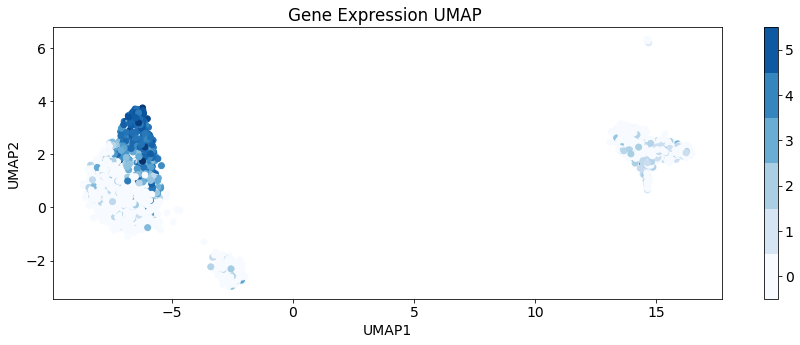

In [ ]:
#Visualizing gene expression between clusters
plt.scatter( ??? , ??? , c=list(A_log["NKG7" ]), cmap='Blues') 
plt.colorbar(boundaries=np.arange(7)-0.5, alpha=0.5).set_ticks(np.arange(6))
plt.title('Gene Expression UMAP ')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')

**Bonus:** Look up the function of some of the genes found to be most highly expressed in particular clusters. Based on this, can you identify which PBMC cell type the cluster corresponds to? 